In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kingabzpro/cosmetics-datasets")

print("Path to dataset files:", path)

100%|██████████| 263k/263k [00:00<00:00, 27.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kingabzpro/cosmetics-datasets/versions/1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

# Load the data
df = pd.read_csv("cosmetics.csv.zip")

# Check the first five rows
display(df.sample(5))

# Inspect the types of products
df.Label.value_counts()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
321,Cleanser,CLINIQUE,"Take The Day Off Makeup Remover For Lids, Lash...",19,4.6,"Water , Isohexadecane , Dimethicone , Cyclopen...",0,0,0,0,0
84,Moisturizer,FRESH,Black Tea Corset Cream Firming Moisturizer,95,4.0,"Water, Isononyl Isononanoate, CetearylIsononan...",0,0,0,0,0
904,Face Mask,SATURDAY SKIN,Spotlight Brightening Mask,6,4.6,"Saccharomyces Ferment, Water, Methylpropanedio...",1,1,1,1,1
1227,Eye cream,BEAUTYBIO,GloPRO® EYE MicroTip™ Attachment Head,35,0.0,Visit the BeautyBio boutique,0,0,0,0,0
1032,Face Mask,DR. JART+,Dermask Intra Jet Firming Solution™,9,3.3,"Water, Glycerin, 1,2-Hexanediol, Ceratonia Sil...",1,1,1,1,1


,count
Label,
Moisturizer,298
Cleanser,281
Face Mask,266
Treatment,248
Eye cream,209
Sun protect,170


In [ ]:
# Filter for moisturizers
moisturizers = df[df['Label'] == "Moisturizer"]

# Filter for dry skin as well
moisturizers_dry = moisturizers[moisturizers["Dry"] == 1]

# Reset index
moisturizers_dry = moisturizers_dry.reset_index(drop=True)

In [ ]:
# Initialize dictionary, list, and initial index
ingredient_idx = {}
corpus = []
idx = 0

# For loop for tokenization
for i in range(len(moisturizers_dry)):
    ingredients = moisturizers_dry['Ingredients'][i]
    ingredients_lower = ingredients.lower()
    tokens = ingredients_lower.split(', ')
    corpus.append(tokens)
    for ingredient in tokens:
        if ingredient not in ingredient_idx:
            ingredient_idx[ingredient ] = idx
            idx += 1

# Check the result
print("The index for decyl oleate is", ingredient_idx['decyl oleate'])

The index for decyl oleate is 25


In [ ]:
# Get the number of items and tokens
M = moisturizers_dry.shape[0]
N = len(ingredient_idx)

# Initialize a matrix of zeros
A = np.zeros((M, N))

In [ ]:
# Define the oh_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_idx[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

In [ ]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = oh_encoder(tokens)
    i += 1

In [ ]:
# Dimension reduction with t-SNE
model = TSNE(n_components=2, learning_rate=200, random_state=42)
tsne_features = model.fit_transform(A)

# Make X, Y columns
moisturizers_dry['X'] = tsne_features[:, 0]
moisturizers_dry['Y'] = tsne_features[:, 1]

In [ ]:
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

# Make a source and a scatter plot
source = ColumnDataSource(moisturizers_dry)
plot = figure(x_axis_label = 'T-SNE 1',
              y_axis_label = 'T-SNE 2',
              width = 500, height = 400)
plot.circle(x = 'X',
    y = 'Y',
    source = source,
    size = 10, color = '#FF7373', alpha = .8)

GlyphRenderer(id='p1044', ...)

In [ ]:
# Create a HoverTool object
hover = HoverTool(tooltips = [('Item', '@Name'),
                              ('Brand', '@Brand'),
                              ('Price', '$@Price'),
                              ('Rank', '@Rank')])
plot.add_tools(hover)

In [ ]:
# Plot the map
show(plot)

In [ ]:
# Print the ingredients of two similar cosmetics
cosmetic_1 = moisturizers_dry[moisturizers_dry['Name'] == "Color Control Cushion Compact Broad Spectrum SPF 50+"]
cosmetic_2 = moisturizers_dry[moisturizers_dry['Name'] == "BB Cushion Hydra Radiance SPF 50"]

# Display each item's data and ingredients
display(cosmetic_1)
print(cosmetic_1.Ingredients.values)
display(cosmetic_2)
print(cosmetic_2.Ingredients.values)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
45,Moisturizer,AMOREPACIFIC,Color Control Cushion Compact Broad Spectrum S...,60,4.0,"Phyllostachis Bambusoides Juice, Cyclopentasil...",1,1,1,1,1,-9.419198,-335.968231


['Phyllostachis Bambusoides Juice, Cyclopentasiloxane, Cyclohexasiloxane, Peg-10 Dimethicone, Phenyl Trimethicone, Butylene Glycol, Butylene Glycol Dicaprylate/Dicaprate, Alcohol, Arbutin, Lauryl Peg-9 Polydimethylsiloxyethyl Dimethicone, Acrylates/Ethylhexyl Acrylate/Dimethicone Methacrylate Copolymer, Polyhydroxystearic Acid, Sodium Chloride, Polymethyl Methacrylate, Aluminium Hydroxide, Stearic Acid, Disteardimonium Hectorite, Triethoxycaprylylsilane, Ethylhexyl Palmitate, Lecithin, Isostearic Acid, Isopropyl Palmitate, Phenoxyethanol, Polyglyceryl-3 Polyricinoleate, Acrylates/Stearyl Acrylate/Dimethicone Methacrylate Copolymer, Dimethicone, Disodium Edta, Trimethylsiloxysilicate, Ethylhexyglycerin, Dimethicone/Vinyl Dimethicone Crosspolymer, Water, Silica, Camellia Japonica Seed Oil, Camillia Sinensis Leaf Extract, Caprylyl Glycol, 1,2-Hexanediol, Fragrance, Titanium Dioxide, Iron Oxides (Ci 77492, Ci 77491, Ci77499).']


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
55,Moisturizer,LANEIGE,BB Cushion Hydra Radiance SPF 50,38,4.3,"Water, Cyclopentasiloxane, Zinc Oxide (CI 7794...",1,1,1,1,1,-31.170496,-359.229309


['Water, Cyclopentasiloxane, Zinc Oxide (CI 77947), Ethylhexyl Methoxycinnamate, PEG-10 Dimethicone, Cyclohexasiloxane, Phenyl Trimethicone, Iron Oxides (CI 77492), Butylene Glycol Dicaprylate/Dicaprate, Niacinamide, Lauryl PEG-9 Polydimethylsiloxyethyl Dimethicone, Acrylates/Ethylhexyl Acrylate/Dimethicone Methacrylate Copolymer, Titanium Dioxide (CI 77891 , Iron Oxides (CI 77491), Butylene Glycol, Sodium Chloride, Iron Oxides (CI 77499), Aluminum Hydroxide, HDI/Trimethylol Hexyllactone Crosspolymer, Stearic Acid, Methyl Methacrylate Crosspolymer, Triethoxycaprylylsilane, Phenoxyethanol, Fragrance, Disteardimonium Hectorite, Caprylyl Glycol, Yeast Extract, Acrylates/Stearyl Acrylate/Dimethicone Methacrylate Copolymer, Dimethicone, Trimethylsiloxysilicate, Polysorbate 80, Disodium EDTA, Hydrogenated Lecithin, Dimethicone/Vinyl Dimethicone Crosspolymer, Mica (CI 77019), Silica, 1,2-Hexanediol, Polypropylsilsesquioxane, Chenopodium Quinoa Seed Extract, Magnesium Sulfate, Calcium Chloride

In [ ]:
df_n0.loc[df.ChemicalCount==9]

NameError: name 'df_n0' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load dataset (adjust if filename is different)
df = pd.read_csv("cosmetics.csv.zip")

# Features and target
X = df[['Price', 'Label', 'Brand', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]
y = df['Rank']

# Preprocessing: One-hot encode categorical features
categorical_features = ['Label', 'Brand']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.6718
R² Score: 0.0324


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv("cosmetics.csv.zip")

# Display the first few rows
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [ ]:
features = df[['Price', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

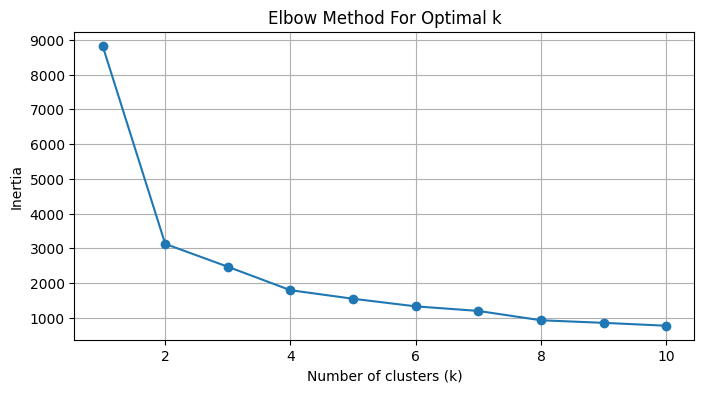

In [ ]:
# Try different values of k and plot the inertia
inertia = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters
df[['Price', 'Cluster']].head()


,Price,Cluster
0,175,0
1,179,0
2,68,3
3,175,0
4,38,2


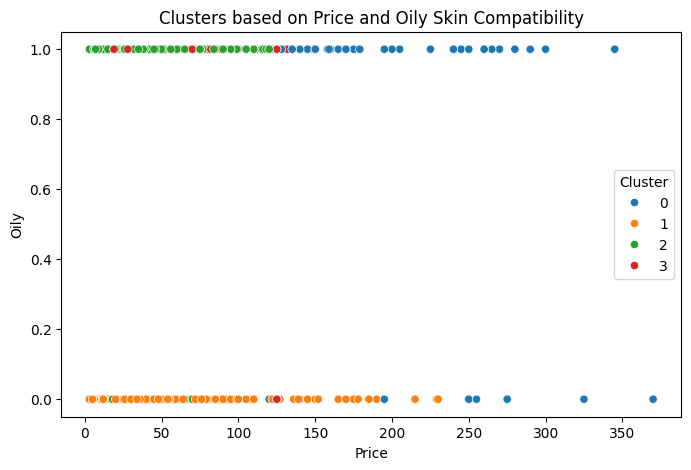

In [ ]:
import seaborn as sns

# Plot clusters by Price and one skin type dimension
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Price', y='Oily', hue='Cluster', palette='tab10')
plt.title('Clusters based on Price and Oily Skin Compatibility')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# Run KMeans (optional if already done)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add PCA columns and cluster labels
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['Cluster'] = clusters


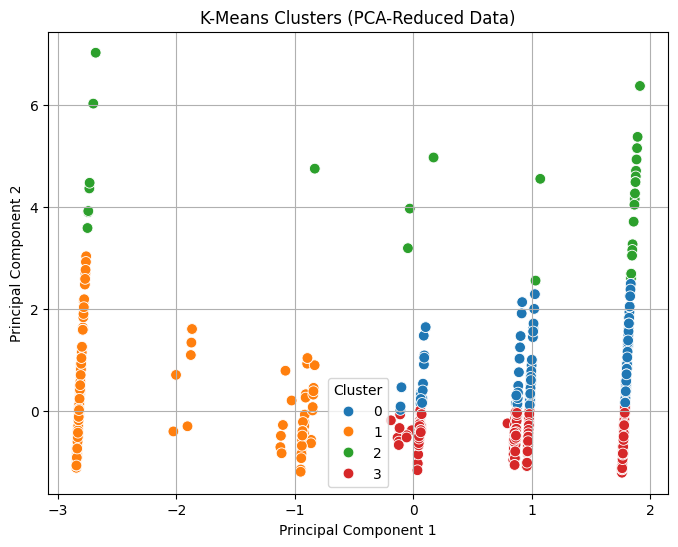

In [ ]:
# Plot PCA-reduced clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=60)
plt.title('K-Means Clusters (PCA-Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
